In [1]:
# ASOS data (5 min)
# Get reanalysis (hourly)
# load dataset and combine
# Correlation between reanalysis and observation

In [35]:
import pandas as pd
import xarray as xr
import metpy.calc as mpcalc
from metpy.units import units
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import glob
from matplotlib.ticker import PercentFormatter

In [3]:
!pwd

/home/jovyan


In [4]:
# read data
path = '/home/jovyan/'
path2 = '/home/jovyan/Reanalysis data_2017/*.nc'
file1 = 'EYW_NEW.csv'
asos_data = pd.read_csv(path + file1, na_values = 'M')

In [5]:
#asos_data
#asos_data.valid = pd.to_datetime(asos_data.valid) #converting time column to pandas datetime column
#asos_data = asos_data.set_index('valid') # sets identifying column

<Axes: >

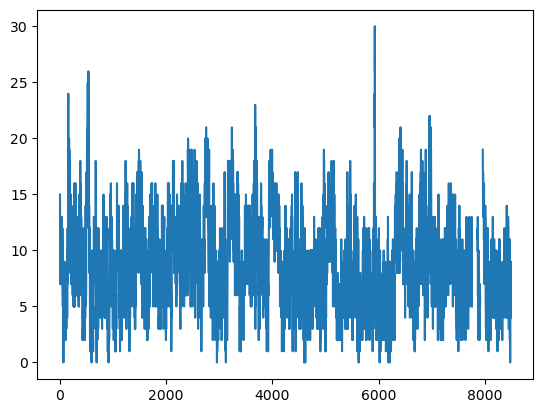

In [6]:
#asos_data['sknt']
asos_data['sknt'].plot()

In [7]:
#asos_data
#asos_data.keys()
asos_data['valid(UTC)'] = pd.to_datetime(asos_data['valid(UTC)']) #converting time column to pandas datetime column
asos_data = asos_data.set_index('valid(UTC)') # sets identifying column

In [8]:
asos_data.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 11:00:00',
               '2017-01-01 12:00:00', '2017-01-01 13:00:00',
               '2017-01-01 14:00:00', '2017-01-01 15:00:00',
               '2017-01-01 16:00:00', '2017-01-01 17:00:00',
               '2017-01-01 18:00:00', '2017-01-01 19:00:00',
               ...
               '2017-12-31 14:00:00', '2017-12-31 15:00:00',
               '2017-12-31 16:00:00', '2017-12-31 17:00:00',
               '2017-12-31 18:00:00', '2017-12-31 19:00:00',
               '2017-12-31 20:00:00', '2017-12-31 21:00:00',
               '2017-12-31 22:00:00', '2017-12-31 23:00:00'],
              dtype='datetime64[ns]', name='valid(UTC)', length=8491, freq=None)

In [9]:
# Convert from 5 min data to hourly data

asos_without_station = asos_data.drop(['station', 'station_name', 'tmpf', 'dwpf'], axis = 1) #drops string values 
#asos_without_station
asos_hourly_data = asos_without_station.resample('1h').mean()

In [10]:
asos_hourly_data

,lat,lon,sknt,drct
valid(UTC),,,,
2017-01-01 00:00:00,24.5561,-81.7596,15.0,119.0
2017-01-01 01:00:00,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,NaN,NaN,NaN,NaN
2017-01-01 03:00:00,NaN,NaN,NaN,NaN
2017-01-01 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2017-12-31 19:00:00,24.5561,-81.7596,9.0,11.0
2017-12-31 20:00:00,24.5561,-81.7596,4.0,77.0
2017-12-31 21:00:00,24.5561,-81.7596,7.0,127.0


<Axes: xlabel='valid(UTC)'>

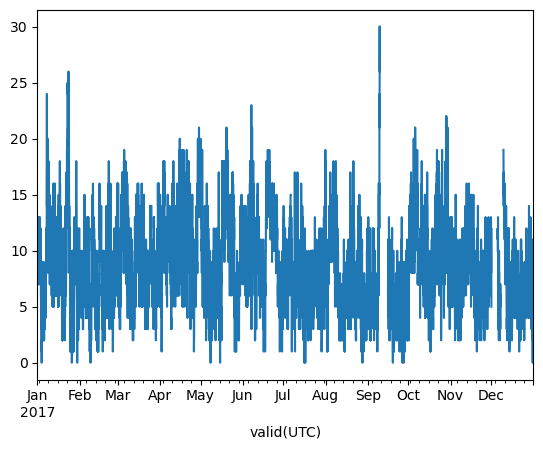

In [11]:
asos_hourly_data['sknt'].plot() #plot data

In [12]:
# read ncdf
#file2 = 'EYW_Reanalysis_data.nc'

all_nc_files = glob.glob(path2)
EYW_reanalysis = xr.open_mfdataset(all_nc_files)
#EYW_reanalysis = xr.open_dataset(path+file2)

In [13]:
EYW_reanalysis

<xarray.Dataset> Size: 14MB
Dimensions:     (valid_time: 8760, latitude: 9, longitude: 9)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 70kB 2017-01-01 ... 2017-12-31T23...
  * latitude    (latitude) float64 72B 25.5 25.25 25.0 24.75 ... 24.0 23.75 23.5
  * longitude   (longitude) float64 72B -82.7 -82.45 -82.2 ... -80.95 -80.7
    expver      (valid_time) <U4 140kB dask.array<chunksize=(8760,), meta=np.ndarray>
Data variables:
    u10         (valid_time, latitude, longitude) float32 3MB dask.array<chunksize=(8760, 9, 9), meta=np.ndarray>
    v10         (valid_time, latitude, longitude) float32 3MB dask.array<chunksize=(8760, 9, 9), meta=np.ndarray>
    sp          (valid_time, latitude, longitude) float32 3MB dask.array<chunksize=(8760, 9, 9), meta=np.ndarray>
    t2m         (valid_time, latitude, longitude) float32 3MB dask.array<chunksize=(8760, 9, 9), meta=np.ndarray>
    tp          (valid_time, latitude, longitude) float32 3MB dask.array<chunksize=(8760, 9, 9), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-21T17:54 GRIB to CDM+CF via cfgrib-0.9.1...

In [14]:
#sleecting nearest pt to asos

EYW_reanalysis_lat_lon = EYW_reanalysis.sel(longitude = -81.7596, latitude = 24.5561, method = 'nearest')

In [15]:
EYW_reanalysis_lat_lon

<xarray.Dataset> Size: 385kB
Dimensions:     (valid_time: 8760)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 70kB 2017-01-01 ... 2017-12-31T23...
    latitude    float64 8B 24.5
    longitude   float64 8B -81.7
    expver      (valid_time) <U4 140kB dask.array<chunksize=(8760,), meta=np.ndarray>
Data variables:
    u10         (valid_time) float32 35kB dask.array<chunksize=(8760,), meta=np.ndarray>
    v10         (valid_time) float32 35kB dask.array<chunksize=(8760,), meta=np.ndarray>
    sp          (valid_time) float32 35kB dask.array<chunksize=(8760,), meta=np.ndarray>
    t2m         (valid_time) float32 35kB dask.array<chunksize=(8760,), meta=np.ndarray>
    tp          (valid_time) float32 35kB dask.array<chunksize=(8760,), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-21T17:54 GRIB to CDM+CF via cfgrib-0.9.1...

In [16]:
EYW_reanalysis_tabular = EYW_reanalysis_lat_lon.to_dataframe()#.drop(['z','r','t'], axis = 1) Used if we have each variable

In [17]:
EYW_reanalysis_tabular

,number,latitude,longitude,expver,u10,v10,sp,t2m,tp
valid_time,,,,,,,,,
2017-01-01 00:00:00,0,24.5,-81.7,0001,-7.840919,3.805915,101965.468750,297.665283,0.0
2017-01-01 01:00:00,0,24.5,-81.7,0001,-7.690142,3.713127,101968.953125,297.906494,0.0
2017-01-01 02:00:00,0,24.5,-81.7,0001,-7.679431,3.927093,101997.984375,298.076538,0.0
2017-01-01 03:00:00,0,24.5,-81.7,0001,-7.789093,4.271374,102028.781250,298.177246,0.0
2017-01-01 04:00:00,0,24.5,-81.7,0001,-7.618521,4.703590,102013.203125,298.232300,0.0
...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,0,24.5,-81.7,0001,-2.961266,-2.074799,102004.000000,292.872314,0.0
2017-12-31 20:00:00,0,24.5,-81.7,0001,-2.997600,-1.391982,101952.554688,293.065796,0.0
2017-12-31 21:00:00,0,24.5,-81.7,0001,-3.105305,-0.861038,101955.062500,293.349792,0.0


In [18]:
final_frame = EYW_reanalysis_tabular.reset_index().set_index('valid_time').drop(['latitude', 'longitude', 'number', 'expver'], axis = 1) #resetting index
final_frame

,u10,v10,sp,t2m,tp
valid_time,,,,,
2017-01-01 00:00:00,-7.840919,3.805915,101965.468750,297.665283,0.0
2017-01-01 01:00:00,-7.690142,3.713127,101968.953125,297.906494,0.0
2017-01-01 02:00:00,-7.679431,3.927093,101997.984375,298.076538,0.0
2017-01-01 03:00:00,-7.789093,4.271374,102028.781250,298.177246,0.0
2017-01-01 04:00:00,-7.618521,4.703590,102013.203125,298.232300,0.0
...,...,...,...,...,...
2017-12-31 19:00:00,-2.961266,-2.074799,102004.000000,292.872314,0.0
2017-12-31 20:00:00,-2.997600,-1.391982,101952.554688,293.065796,0.0
2017-12-31 21:00:00,-3.105305,-0.861038,101955.062500,293.349792,0.0


In [19]:
#final_frame['u']
#final_frame['v']

In [20]:
#combining datasets
#calculate wind speed from u and v components

u_wind_era = final_frame['u10'].values * units('m/s')

#u_wind_era

v_wind_era = final_frame['v10'].values * units('m/s')

wind_speed_era = mpcalc.wind_speed(u = u_wind_era, v = v_wind_era)
#wind_speed_era

In [21]:
wind_direction_era = mpcalc.wind_direction(u = u_wind_era, v = v_wind_era)
#wind_direction_era

In [22]:
#Adding new wind speed and direction to dataframe final_frame

final_frame['wind_speed_era'] = wind_speed_era

final_frame['wind_direction_era'] = wind_direction_era

final_frame

,u10,v10,sp,t2m,tp,wind_speed_era,wind_direction_era
valid_time,,,,,,,
2017-01-01 00:00:00,-7.840919,3.805915,101965.468750,297.665283,0.0,8.715790,115.891541
2017-01-01 01:00:00,-7.690142,3.713127,101968.953125,297.906494,0.0,8.539648,115.773224
2017-01-01 02:00:00,-7.679431,3.927093,101997.984375,298.076538,0.0,8.625295,117.084206
2017-01-01 03:00:00,-7.789093,4.271374,102028.781250,298.177246,0.0,8.883389,118.739433
2017-01-01 04:00:00,-7.618521,4.703590,102013.203125,298.232300,0.0,8.953526,121.690720
...,...,...,...,...,...,...,...
2017-12-31 19:00:00,-2.961266,-2.074799,102004.000000,292.872314,0.0,3.615782,54.983150
2017-12-31 20:00:00,-2.997600,-1.391982,101952.554688,293.065796,0.0,3.305029,65.091469
2017-12-31 21:00:00,-3.105305,-0.861038,101955.062500,293.349792,0.0,3.222469,74.502380


In [23]:
# comparing both datasets from ASOS and era5

combined_dataset = pd.merge(asos_hourly_data, final_frame, left_index = True, right_index= True, how = 'inner')

combined_dataset

,lat,lon,sknt,drct,u10,v10,sp,t2m,tp,wind_speed_era,wind_direction_era
valid(UTC),,,,,,,,,,,
2017-01-01 00:00:00,24.5561,-81.7596,15.0,119.0,-7.840919,3.805915,101965.468750,297.665283,0.0,8.715790,115.891541
2017-01-01 01:00:00,NaN,NaN,NaN,NaN,-7.690142,3.713127,101968.953125,297.906494,0.0,8.539648,115.773224
2017-01-01 02:00:00,NaN,NaN,NaN,NaN,-7.679431,3.927093,101997.984375,298.076538,0.0,8.625295,117.084206
2017-01-01 03:00:00,NaN,NaN,NaN,NaN,-7.789093,4.271374,102028.781250,298.177246,0.0,8.883389,118.739433
2017-01-01 04:00:00,NaN,NaN,NaN,NaN,-7.618521,4.703590,102013.203125,298.232300,0.0,8.953526,121.690720
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,24.5561,-81.7596,9.0,11.0,-2.961266,-2.074799,102004.000000,292.872314,0.0,3.615782,54.983150
2017-12-31 20:00:00,24.5561,-81.7596,4.0,77.0,-2.997600,-1.391982,101952.554688,293.065796,0.0,3.305029,65.091469
2017-12-31 21:00:00,24.5561,-81.7596,7.0,127.0,-3.105305,-0.861038,101955.062500,293.349792,0.0,3.222469,74.502380


In [24]:
combined_dataset['ASOS_wndspd_mps'] = combined_dataset['sknt'] / 1.9
combined_dataset

,lat,lon,sknt,drct,u10,v10,sp,t2m,tp,wind_speed_era,wind_direction_era,ASOS_wndspd_mps
valid(UTC),,,,,,,,,,,,
2017-01-01 00:00:00,24.5561,-81.7596,15.0,119.0,-7.840919,3.805915,101965.468750,297.665283,0.0,8.715790,115.891541,7.894737
2017-01-01 01:00:00,NaN,NaN,NaN,NaN,-7.690142,3.713127,101968.953125,297.906494,0.0,8.539648,115.773224,NaN
2017-01-01 02:00:00,NaN,NaN,NaN,NaN,-7.679431,3.927093,101997.984375,298.076538,0.0,8.625295,117.084206,NaN
2017-01-01 03:00:00,NaN,NaN,NaN,NaN,-7.789093,4.271374,102028.781250,298.177246,0.0,8.883389,118.739433,NaN
2017-01-01 04:00:00,NaN,NaN,NaN,NaN,-7.618521,4.703590,102013.203125,298.232300,0.0,8.953526,121.690720,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,24.5561,-81.7596,9.0,11.0,-2.961266,-2.074799,102004.000000,292.872314,0.0,3.615782,54.983150,4.736842
2017-12-31 20:00:00,24.5561,-81.7596,4.0,77.0,-2.997600,-1.391982,101952.554688,293.065796,0.0,3.305029,65.091469,2.105263
2017-12-31 21:00:00,24.5561,-81.7596,7.0,127.0,-3.105305,-0.861038,101955.062500,293.349792,0.0,3.222469,74.502380,3.684211


In [25]:
corr_coef = combined_dataset['ASOS_wndspd_mps'].corr(combined_dataset['wind_speed_era']) #correlation coefficient


In [26]:
correlation_percentage = (corr_coef * corr_coef) * 100 #find correlation percentage

print(f'{correlation_percentage} %')

52.3075039289081 %


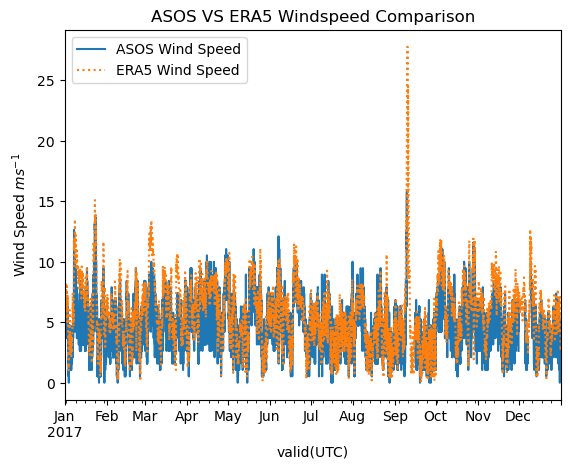

In [58]:
ax = combined_dataset['ASOS_wndspd_mps'].plot(title = 'ASOS VS ERA5 Windspeed Comparison')
combined_dataset['wind_speed_era'].plot(ax=ax, linestyle = ':')
ax.legend(['ASOS Wind Speed', 'ERA5 Wind Speed'])
ax.set_ylabel(r'Wind Speed $ m s^{-1} $')
plt.savefig('Line_compare_ASOS_ERA5.png',bbox_inches = 'tight',dpi=300)

<Axes: xlabel='ASOS_wndspd_mps', ylabel='wind_speed_era'>

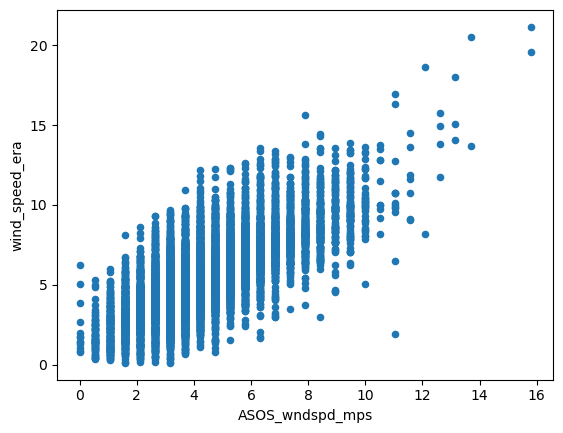

In [28]:
combined_dataset[['ASOS_wndspd_mps', 'wind_speed_era']].plot(x = 'ASOS_wndspd_mps', y = 'wind_speed_era', kind = 'scatter')

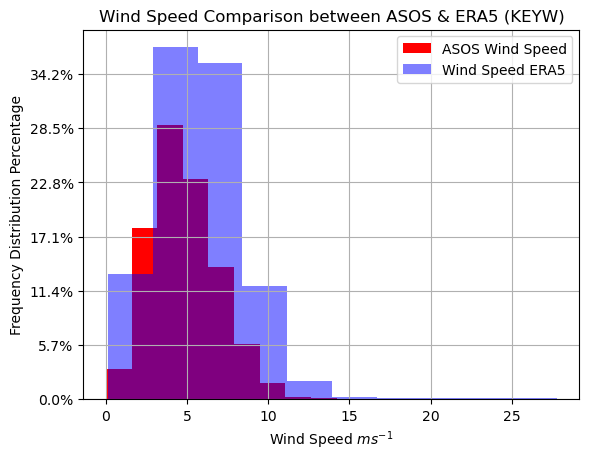

In [29]:
fig, ax = plt.subplots() #create a figure and axis object to control the plots

combined_dataset['ASOS_wndspd_mps'].hist(ax = ax, color = 'r', label = 'ASOS Wind Speed')
combined_dataset['wind_speed_era'].hist(ax = ax, color = 'b', alpha = 0.5, label = 'Wind Speed ERA5')

ax.legend()

ax.set_xlabel(r'Wind Speed $ m s^{-1} $')
ax.set_ylabel('Frequency Distribution Percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(len(combined_dataset)))

ax.set_title('Wind Speed Comparison between ASOS & ERA5 (KEYW)')
plt.savefig('Windspeed_compare_ASOS_ERA5.png',dpi=300)